In [15]:
import networkx as nx
import os 
import yaml

In [16]:
graph = nx.read_graphml('galaxy_region_graph_coords.graphml')
## Assuming G is your original graph and it has 'constellation' as a node attribute

# List of nodes for the subset
node_subset = ['Metropolis', 'TheForge', 'Tash-Murkon', 'SinqLaison', 'Lonetrek', 'Heimatar', 'Domain']
# Create a subgraph from the main graph G for the specified nodes
subG = graph.subgraph(node_subset)

# Initialize a new graph to store only the valid edges based on your conditions
new_graph = nx.Graph()

# Add nodes to the new graph
new_graph.add_nodes_from(subG.nodes(data=True))

In [17]:
for node in new_graph.nodes(data=True):
    print(node)

('Metropolis', {'region_ID': 10000042, 'X_coordinate': -7.426705555731202e+16, 'Y_coordinate': 3.5798638720555244e+16, 'Z_coordinate': 4.5153300095399016e+16})
('Tash-Murkon', {'region_ID': 10000020, 'X_coordinate': -2.1175337186387933e+17, 'Y_coordinate': 6.283870597106798e+16, 'Z_coordinate': -1.2393481453766448e+17})
('TheForge', {'region_ID': 10000002, 'X_coordinate': -9.642032966461757e+16, 'Y_coordinate': 6.40270758377404e+16, 'Z_coordinate': 1.125398171329042e+17})
('Heimatar', {'region_ID': 10000030, 'X_coordinate': -9.292928549160074e+16, 'Y_coordinate': 3.2124391627089524e+16, 'Z_coordinate': 2.414872139936921e+16})
('Lonetrek', {'region_ID': 10000016, 'X_coordinate': -1.8917122217723917e+17, 'Y_coordinate': 9.455246335094957e+16, 'Z_coordinate': 1.5569612898227043e+17})
('SinqLaison', {'region_ID': 10000032, 'X_coordinate': -1.819128830764801e+17, 'Y_coordinate': 4.16995387869047e+16, 'Z_coordinate': 3.978073867707421e+16})
('Domain', {'region_ID': 10000043, 'X_coordinate': 

In [14]:
nx.write_graphml(new_graph, 'galaxy_region_graph_coords_subset_typeid_262.graphml')

In [5]:
new_graph.write

Graph with 7 nodes and 0 edges


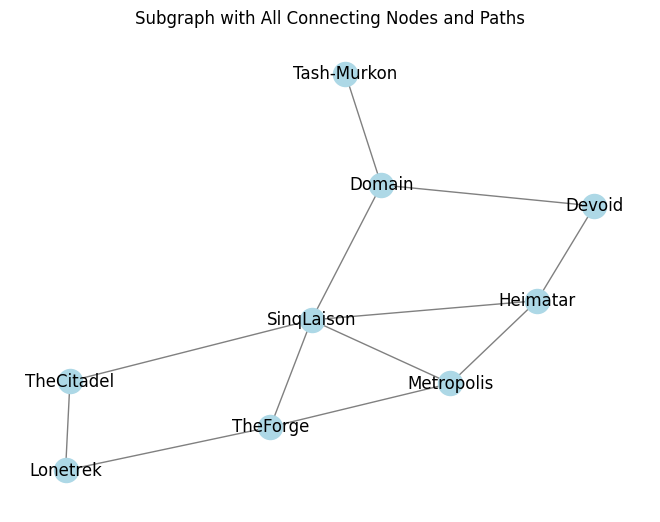

In [18]:
import networkx as nx

# Assuming G is your original graph

# Define your subset of interest
node_subset = ['Metropolis', 'TheForge', 'Tash-Murkon', 'SinqLaison', 'Lonetrek', 'Heimatar', 'Domain']
# Initialize an empty graph to hold the subset and connecting paths
subgraph = nx.Graph()

# Iterate over each pair of nodes in the subset
for i in range(len(node_subset)):
    for j in range(i + 1, len(node_subset)):
        node1 = node_subset[i]
        node2 = node_subset[j]
        
        # Compute the shortest path between each pair
        try:
            path = nx.shortest_path(graph, source=node1, target=node2)
            # Extract edges from the path
            path_edges = zip(path[:-1], path[1:])
            
            # Add nodes and edges from the path to the subgraph
            for edge in path_edges:
                subgraph.add_edge(edge[0], edge[1], weight=graph[edge[0]][edge[1]]['weight'] if 'weight' in graph[edge[0]][edge[1]] else 1)
                
        except nx.NetworkXNoPath:
            print(f"No path between {node1} and {node2}")

# Now subgraph contains all nodes and edges from the shortest paths connecting the subset nodes
# You can now work with this graph (plotting, analysis, etc.)

# Optional: Plotting to visualize the subgraph
import matplotlib.pyplot as plt

pos = nx.spring_layout(subgraph)  # Use spring layout for a nice layout
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Subgraph with All Connecting Nodes and Paths')
plt.show()


In [19]:
nx.write_graphml(subgraph, 'galaxy_region_graph_coords_subgraph_typeid_262.graphml')

In [20]:
for node in subgraph.nodes(data=True):
    print(node)

('Metropolis', {})
('TheForge', {})
('SinqLaison', {})
('Domain', {})
('Tash-Murkon', {})
('Lonetrek', {})
('Heimatar', {})
('TheCitadel', {})
('Devoid', {})


In [21]:
galaxy_graph = nx.read_gml('galaxy_graph_v2.gml')
# Iterate over all nodes and their attributes
region_dict = {}

for node, attrs in galaxy_graph.nodes(data=True):
    print(f"Node {node} has region_name {attrs['region_name']} region_ID {attrs['region_ID']}")
    region_dict[node] = {}
    region_dict[node]['region_name'] = attrs['region_name']
    region_dict[node]['region_ID'] = attrs['region_ID'] 

Node Gens has region_name Aridia region_ID 10000054
Node Yehaba has region_name Aridia region_ID 10000054
Node Kenahehab has region_name Aridia region_ID 10000054
Node Kamih has region_name Aridia region_ID 10000054
Node Hier has region_name Aridia region_ID 10000054
Node Sadana has region_name Aridia region_ID 10000054
Node Nema has region_name Aridia region_ID 10000054
Node Jasson has region_name Aridia region_ID 10000054
Node Haimeh has region_name Aridia region_ID 10000054
Node Fihrneh has region_name Aridia region_ID 10000054
Node Shirshocin has region_name Aridia region_ID 10000054
Node Maalna has region_name Aridia region_ID 10000054
Node Shakasi has region_name Aridia region_ID 10000054
Node Maseera has region_name Aridia region_ID 10000054
Node Zayi has region_name Aridia region_ID 10000054
Node Van has region_name Aridia region_ID 10000054
Node Agaullores has region_name Solitude region_ID 10000044
Node Otakod has region_name Genesis region_ID 10000067
Node Anath has region_n

In [24]:
seen_values = set()
filtered_regions = {}
for solar_system_name, system_dict in region_dict.items():
    print(solar_system_name, system_dict)
    if system_dict['region_ID'] not in seen_values:
        seen_values.add(system_dict['region_ID'])
        filtered_regions[system_dict['region_name']] = system_dict['region_ID']

print(filtered_regions)




Gens {'region_name': 'Aridia', 'region_ID': 10000054}
Yehaba {'region_name': 'Aridia', 'region_ID': 10000054}
Kenahehab {'region_name': 'Aridia', 'region_ID': 10000054}
Kamih {'region_name': 'Aridia', 'region_ID': 10000054}
Hier {'region_name': 'Aridia', 'region_ID': 10000054}
Sadana {'region_name': 'Aridia', 'region_ID': 10000054}
Nema {'region_name': 'Aridia', 'region_ID': 10000054}
Jasson {'region_name': 'Aridia', 'region_ID': 10000054}
Haimeh {'region_name': 'Aridia', 'region_ID': 10000054}
Fihrneh {'region_name': 'Aridia', 'region_ID': 10000054}
Shirshocin {'region_name': 'Aridia', 'region_ID': 10000054}
Maalna {'region_name': 'Aridia', 'region_ID': 10000054}
Shakasi {'region_name': 'Aridia', 'region_ID': 10000054}
Maseera {'region_name': 'Aridia', 'region_ID': 10000054}
Zayi {'region_name': 'Aridia', 'region_ID': 10000054}
Van {'region_name': 'Aridia', 'region_ID': 10000054}
Agaullores {'region_name': 'Solitude', 'region_ID': 10000044}
Otakod {'region_name': 'Genesis', 'region_ID

In [25]:
filtered_regions  = {key.replace(" ", ""): value for key, value in filtered_regions.items()}


In [28]:
i = 0
for node in subgraph.nodes():

    subgraph.nodes[node]['region_ID'] = filtered_regions[node]
    subgraph.nodes[node]['idx'] = i
    print("Node {} has region_ID {}".format(node, subgraph.nodes[node]['region_ID']))
    i += 1

Node Metropolis has region_ID 10000042
Node TheForge has region_ID 10000002
Node SinqLaison has region_ID 10000032
Node Domain has region_ID 10000043
Node Tash-Murkon has region_ID 10000020
Node Lonetrek has region_ID 10000016
Node Heimatar has region_ID 10000030
Node TheCitadel has region_ID 10000033
Node Devoid has region_ID 10000036


In [29]:
nx.write_gml(subgraph, 'galaxy_region_graph_coords_subgraph_typeid_262.gml')

In [58]:
nx.write_graphml(subgraph, 'region_hubs_graph.graphml')